In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB
None


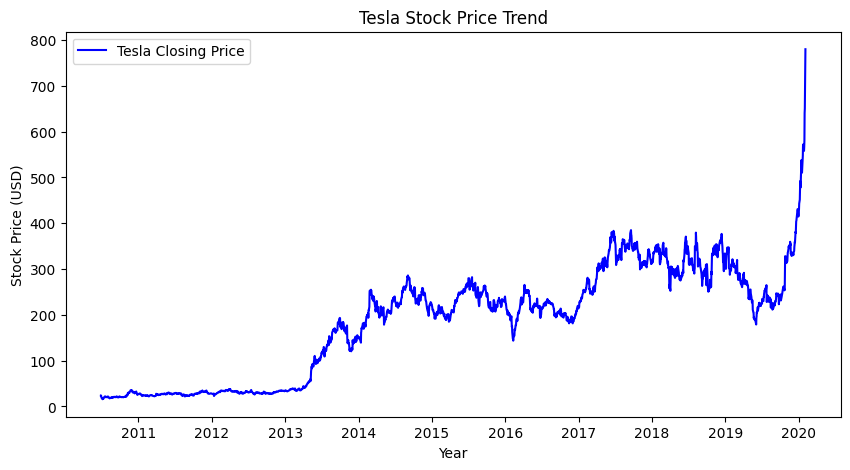

In [3]:
df = pd.read_csv("TSLA.csv")  # Load Tesla stock data
print(df.head())
print(df.info())

# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Visualize Stock Price Trend
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label="Tesla Closing Price", color="blue")
plt.title("Tesla Stock Price Trend")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


In [4]:
df["Days"] = (df.index - df.index.min()).days  # Convert dates to numerical values

# Select relevant features
X = df[["Days"]].values  # Independent variable (time)
y = df["Close"].values  # Dependent variable (stock price)


In [5]:
degree = 3  # Polynomial degree
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict on training data
y_pred = model.predict(X_poly)

# Evaluate Model
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 2455.18


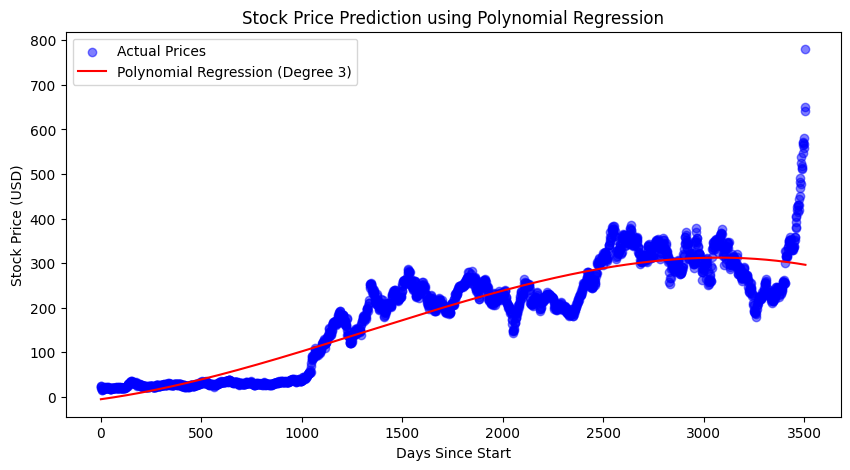

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Prices", alpha=0.5)
plt.plot(X, y_pred, color="red", label=f"Polynomial Regression (Degree {degree})")
plt.title("Stock Price Prediction using Polynomial Regression")
plt.xlabel("Days Since Start")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


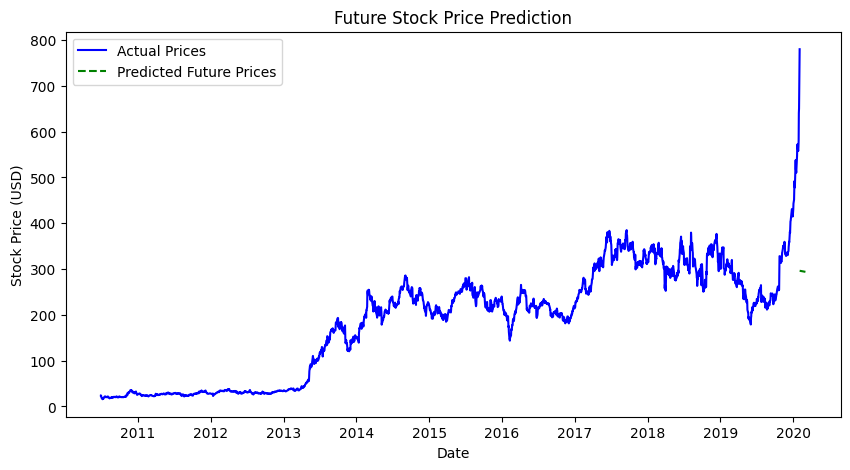

In [7]:
future_days = np.arange(X.max() + 1, X.max() + 31).reshape(-1, 1)
future_days_poly = poly.transform(future_days)

future_predictions = model.predict(future_days_poly)

# Visualize Predictions
plt.figure(figsize=(10, 5))
plt.plot(df.index, y, color="blue", label="Actual Prices")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), future_predictions, color="green", linestyle="dashed", label="Predicted Future Prices")
plt.title("Future Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()
